In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
# Initial DF setup
df = pd.read_excel("Ecommerce Data.xlsx")
df = df.drop(columns=['Unnamed: 66', 'Unnamed: 67', 'Dear Greg,', 'id', 'logtarg'])
df = df.dropna()

freq = ['Ffiction1', 'Fclassics3',
       'Fcartoons5', 'Flegends6', 'Fphilosophy7', 'Freligion8', 'Fpsychology9',
       'Flinguistics10', 'Fart12', 'Fmusic14', 'Ffacsimile17', 'Fhistory19',
       'Fconthist20', 'Feconomy21', 'Fpolitics22', 'Fscience23', 'Fcompsci26',
       'Frailroads27', 'Fmaps30', 'Ftravelguides31', 'Fhealth35', 'Fcooking36',
       'Flearning37', 'FGamesRiddles38', 'Fsports39', 'Fhobby40', 'Fnature41',
       'Fencyclopaedia44', 'Fvideos50', 'Fnonbooks99']

In [7]:
cols_to_add = [
     [],
     ["m"],
     ["r"],
     ["m", "r"]
 ]
scaler = MinMaxScaler()
results_df = pd.DataFrame(columns=["Cols", "Num Components", "k", "Inertia", "Variance Ratio", "Silhouette Score"])
row = 0

for cols in cols_to_add:
    # redefine freq_df with each iteration
    freq_df = df[freq].div(df['f'], axis=0)
    freq_df = pd.concat([freq_df, df[cols]], axis=1)
    freq_df = freq_df.dropna()

    if "m" in freq_df.columns:
        freq_df['m'] = scaler.fit_transform(freq_df[['m']])
    if "r" in freq_df.columns:
         freq_df['r'] = scaler.fit_transform(freq_df[['r']])
     # Z-Score Method
    z_scores = np.abs(stats.zscore(freq_df))
    mask = (z_scores < 3).all(axis=1)

    for num_components in range(5, 12):
        df_cleaned = freq_df[mask]
        pca = PCA(n_components=num_components)  # Choose the number of components
        k_range = range(2, 10)  # Test k from 1 to 10 (you can adjust the range)
        for k in k_range:
            df_pca = pca.fit_transform(df_cleaned)

            # Convert PCA results to DataFrame for easy interpretation
            df_pca = pd.DataFrame(df_pca, columns=[f"PC{i}" for i in range(1, num_components+1)])
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(df_pca)
            score = silhouette_score(df_pca, kmeans.labels_)
            results_df.loc[row] = [cols, num_components, k, kmeans.inertia_, sum(pca.explained_variance_ratio_), score]
            row = row + 1
            print(f"Iteration {row}")

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteratio

In [9]:
results_df

,Cols,Num Components,k,Inertia,Variance Ratio,Silhouette Score
0,[],5,2,16321.183048,0.760873,0.319668
1,[],5,3,13203.436485,0.760873,0.291876
2,[],5,4,10435.751317,0.760873,0.309607
3,[],5,5,8519.669965,0.760873,0.300962
4,[],5,6,7761.211538,0.760873,0.287785
...,...,...,...,...,...,...
219,"[m, r]",11,5,13473.518672,0.921936,0.214853
220,"[m, r]",11,6,12700.660951,0.921936,0.199886
221,"[m, r]",11,7,12006.682085,0.921936,0.191951
222,"[m, r]",11,8,11631.037454,0.921936,0.184787


In [10]:
df_sorted = results_df.sort_values(by='Silhouette Score', ascending=False)
df_sorted.head(20)

,Cols,Num Components,k,Inertia,Variance Ratio,Silhouette Score
0,[],5,2,16321.183048,0.760873,0.319668
56,[m],5,2,16317.019438,0.760833,0.319285
168,"[m, r]",5,2,16200.651159,0.742407,0.318326
112,[r],5,2,16204.820915,0.742451,0.318293
2,[],5,4,10435.751317,0.760873,0.309607
58,[m],5,4,10433.896652,0.760833,0.309570
114,[r],5,4,10377.649316,0.742451,0.308597
170,"[m, r]",5,4,10375.800887,0.742407,0.308498
8,[],6,2,17432.014305,0.801473,0.301505
59,[m],5,5,8517.868001,0.760833,0.301230


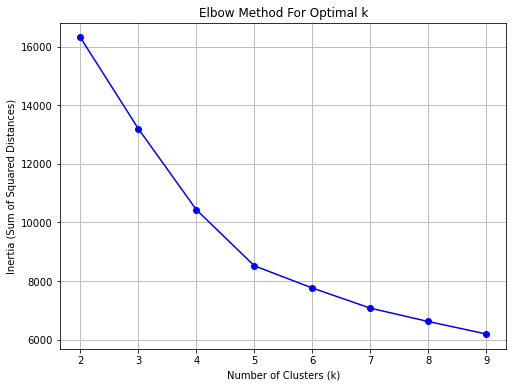

In [11]:
###### Selecting Just 1 to look at
cols = ["m"]
scaler = MinMaxScaler()

# redefine freq_df with each iteration
freq_df = df[freq].div(df['f'], axis=0)
freq_df = pd.concat([freq_df, df[cols]], axis=1)
freq_df = freq_df.dropna()

if "m" in freq_df.columns:
    freq_df['m'] = scaler.fit_transform(freq_df[['m']])

# Z-Score Method
z_scores = np.abs(stats.zscore(freq_df))
mask = (z_scores < 3).all(axis=1)

df_cleaned = freq_df[mask]
pca = PCA(n_components=5)  # Choose the number of components
df_pca = pca.fit_transform(df_cleaned)

# Convert PCA results to DataFrame for easy interpretation
df_pca = pd.DataFrame(df_pca, columns=[f"PC{i}" for i in range(1, 6)])

k_range = range(2, 10)  # Test k from 1 to 10 (you can adjust the range)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)

    inertia.append(kmeans.inertia_)

# Step 3: Plot the inertia (Elbow Method)
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# score = silhouette_score(df_pca, kmeans.labels_)
# print([cols, num_components, k, kmeans.inertia_, sum(pca.explained_variance_ratio_), score])


Cluster Centers: 
 [[-0.33968724  0.28780777 -0.54766101  0.27955985 -0.06087809]
 [-0.08226614 -0.12540543 -0.06981439 -0.2902754   0.04749701]
 [ 1.14326649  0.30279433 -0.00564241  0.02319002 -0.02324531]
 [-0.40317243  0.54935302  0.6891915   0.07113591 -0.00305641]
 [ 0.03656663 -0.87740056  0.23156051  0.43471569 -0.04084138]]


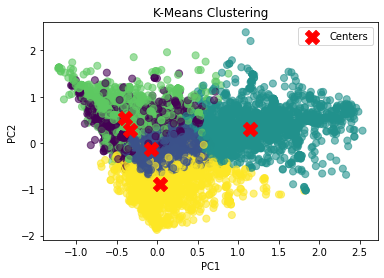

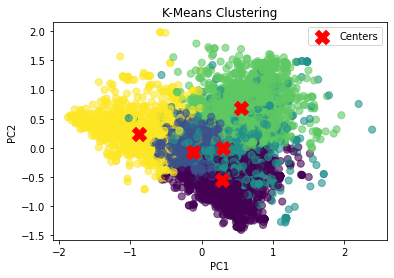

In [12]:
# Plotting stuff here
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_pca)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Print the cluster centers
print("Cluster Centers: \n", centers)

plt.scatter(df_pca.PC1, df_pca.PC2, c=labels, cmap='viridis', s=50, alpha=0.6)

# Plot the cluster centers (assuming 'centers' is a numpy array with shape (K, 2))
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')

plt.title('K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

plt.scatter(df_pca.PC2, df_pca.PC3, c=labels, cmap='viridis', s=50, alpha=0.6)

# Plot the cluster centers (assuming 'centers' is a numpy array with shape (K, 2))
plt.scatter(centers[:, 1], centers[:, 2], c='red', marker='X', s=200, label='Centers')

plt.title('K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [13]:
df_cleaned['Cluster'] = kmeans.labels_

# Calculate statistics for each cluster
cluster_summary = df_cleaned.groupby('Cluster').agg(['mean', 'std', 'min', 'max'])
print(cluster_summary)

cluster_means = df_cleaned.groupby('Cluster').mean()

# Number of top columns you want to find for each cluster
n = 10  # For example, to find the top 5 columns

# Find the n columns with the greatest mean value for each cluster
top_n_columns = cluster_means.apply(lambda x: x.nlargest(n).index.tolist(), axis=1)

print("Top n columns for each cluster:")
print(top_n_columns)

        Ffiction1                      Fclassics3                           \
             mean       std  min   max       mean       std  min       max   
Cluster                                                                      
0        0.068179  0.135820  0.0  0.75   0.025715  0.070286  0.0  0.411765   
1        0.067784  0.131033  0.0  0.75   0.021858  0.063929  0.0  0.421053   
2        0.064776  0.135010  0.0  0.75   0.016415  0.054630  0.0  0.400000   
3        0.041902  0.103419  0.0  0.75   0.013157  0.048805  0.0  0.416667   
4        0.061295  0.130325  0.0  0.75   0.014262  0.051179  0.0  0.400000   

        Fcartoons5            ... Fvideos50       Fnonbooks99                 \
              mean       std  ...       min   max        mean       std  min   
Cluster                       ...                                              
0         0.030650  0.083576  ...       0.0  1.00    0.083158  0.198745  0.0   
1         0.042845  0.102548  ...       0.0  1.15    0.

<ipython-input-13-5caca8035424>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.labels_


In [14]:
for i in range(0,5):
    print(top_n_columns[i])

['Fhistory19', 'Fconthist20', 'Ftravelguides31', 'Fmusic14', 'Freligion8', 'Fhealth35', 'Fart12', 'Fnonbooks99', 'Ffiction1', 'Flearning37']
['Ftravelguides31', 'Fhistory19', 'Fmusic14', 'Fhealth35', 'Fnonbooks99', 'Fconthist20', 'Freligion8', 'Fvideos50', 'Flearning37', 'Fart12']
['Fmusic14', 'Fhistory19', 'Fconthist20', 'Fhealth35', 'Ftravelguides31', 'Fvideos50', 'Flearning37', 'Freligion8', 'Fnonbooks99', 'Ffiction1']
['Fconthist20', 'Fhistory19', 'Fmusic14', 'Fhealth35', 'Ftravelguides31', 'Freligion8', 'Fnonbooks99', 'Flearning37', 'Fvideos50', 'Ffiction1']
['Fhealth35', 'Fmusic14', 'Fhistory19', 'Flearning37', 'Ftravelguides31', 'Fnonbooks99', 'Fconthist20', 'Freligion8', 'Fhobby40', 'Fvideos50']


In [15]:
top_n_columns[0]

['Fhistory19',
 'Fconthist20',
 'Ftravelguides31',
 'Fmusic14',
 'Freligion8',
 'Fhealth35',
 'Fart12',
 'Fnonbooks99',
 'Ffiction1',
 'Flearning37']

In [50]:
cluster_means

,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,Fpsychology9,Flinguistics10,Fart12,Fmusic14,Ffacsimile17,Fhistory19,Fconthist20,Feconomy21,Fpolitics22,Fscience23,Fcompsci26,Frailroads27,Fmaps30,Ftravelguides31,Fhealth35,Fcooking36,Flearning37,FGamesRiddles38,Fsports39,Fhobby40,Fnature41,Fencyclopaedia44,Fvideos50,Fnonbooks99,m
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.068179,0.025715,0.030650,0.010727,0.035686,0.146012,0.002063,0.023665,0.089835,0.169060,0.005198,1.084788,0.202241,0.013765,0.000919,0.042037,0.009009,0.014650,0.006464,0.174826,0.116785,0.036137,0.067050,0.001546,0.000008,0.064395,0.027012,0.052918,0.038645,0.083158,0.000550
1,0.067784,0.021858,0.042845,0.007736,0.029833,0.124800,0.002869,0.022552,0.079609,0.162488,0.003268,0.198824,0.134459,0.018264,0.001146,0.042888,0.013030,0.015200,0.007895,0.222412,0.160065,0.046804,0.098277,0.002273,0.000007,0.078545,0.039545,0.065842,0.103005,0.142384,0.000364
2,0.064776,0.016415,0.042661,0.006847,0.021556,0.087758,0.002229,0.015075,0.057868,1.496047,0.002105,0.200859,0.169908,0.011166,0.001057,0.025437,0.008335,0.008976,0.004233,0.139173,0.168763,0.035195,0.094515,0.001787,0.000006,0.052916,0.027328,0.045506,0.100747,0.073430,0.000405
3,0.041902,0.013157,0.028055,0.004121,0.018428,0.078044,0.001888,0.013142,0.040119,0.166129,0.001107,0.337115,1.238558,0.013869,0.001792,0.025128,0.007104,0.021946,0.005035,0.098483,0.120603,0.019521,0.057229,0.000892,0.000000,0.041453,0.020245,0.037986,0.056226,0.072849,0.000437
4,0.061295,0.014262,0.043542,0.005857,0.029685,0.114856,0.004393,0.020612,0.037042,0.209993,0.001375,0.182372,0.122218,0.039415,0.001807,0.045676,0.017800,0.006964,0.004762,0.139204,1.251143,0.057284,0.160722,0.002582,0.000010,0.082185,0.045070,0.056099,0.061817,0.129731,0.000377


# Calculating the business value

In [94]:
from IPython.display import display, Math, Markdown

# Define LaTeX formulas
base_model_formula = r"T = \sum_{i=1}^{10} \frac{M(f_i) \cdot \text{Mean}(f_i)}{\text{Total Mean}}"
cluster_model_formula = r"CV = \sum_{i=1}^{10} \frac{M(f_i) \cdot \text{Mean}(f_i \mid C)}{\sum_{j=1}^{32} \text{Mean}(f_j \mid C)}"
adjusted_cluster_model_formula = r"ACM = \sum_{C=1}^{5} \left( P_C \cdot CV_C \right)"
percent_difference_formula = r"\text{Percent Difference} = \frac{100 \cdot (ACM - T)}{T}"

# Define the explanations
explanation = """
### Explanation of Each Formula and Variable:

1. **Base Model Formula**:
\\[
T = \\sum_{i=1}^{10} \\frac{M(f_i) \\cdot \\text{Mean}(f_i)}{\\text{Total Mean}}
\\]
- **T**: Total monetary value of the base model.
- **M(f_i)**: Monetary value assigned to feature \( f_i \).
- **Mean(f_i)**: Average frequency of feature \( f_i \) across all users.
- **Total Mean**: The sum of the mean values for the top 10 features.

2. **Cluster Model Formula**:
\\[
CV = \\sum_{i=1}^{10} \\frac{M(f_i) \\cdot \\text{Mean}(f_i \\mid C)}{\\sum_{j=1}^{32} \\text{Mean}(f_j \\mid C)}
\\]
- **CV**: Monetary value for a specific cluster \( C \).
- **M(f_i)**: Monetary value of feature \( f_i \).
- **Mean(f_i \\mid C)**: Average frequency of feature \( f_i \) within cluster \( C \).
- **\\sum_{j=1}^{32} \\text{Mean}(f_j \\mid C)**: Sum of average frequencies of all 32 features in cluster \( C \).

3. **Adjusted Cluster Model Formula**:
\\[
ACM = \\sum_{C=1}^{5} \\left( P_C \\cdot CV_C \\right)
\\]
- **ACM**: Adjusted monetary value for the cluster model.
- **P_C**: Proportion of users in cluster \( C \) relative to the total user base.
- **CV_C**: Monetary value for cluster \( C \).

4. **Percent Difference Formula**:
\\[
\\text{Percent Difference} = \\frac{100 \\cdot (ACM - T)}{T}
\\]
- **Percent Difference**: The relative improvement of the cluster model over the base model, expressed as a percentage.
- **ACM**: Adjusted cluster model value.
- **T**: Base model total value.
"""

# Display the formulas with explanations
display(Math(base_model_formula))
display(Math(cluster_model_formula))
display(Math(adjusted_cluster_model_formula))
display(Math(percent_difference_formula))
display(Markdown(explanation))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


### Explanation of Each Formula and Variable:

1. **Base Model Formula**:
\[
T = \sum_{i=1}^{10} \frac{M(f_i) \cdot \text{Mean}(f_i)}{\text{Total Mean}}
\]
- **T**: Total monetary value of the base model.
- **M(f_i)**: Monetary value assigned to feature \( f_i \).
- **Mean(f_i)**: Average frequency of feature \( f_i \) across all users.
- **Total Mean**: The sum of the mean values for the top 10 features.

2. **Cluster Model Formula**:
\[
CV = \sum_{i=1}^{10} \frac{M(f_i) \cdot \text{Mean}(f_i \mid C)}{\sum_{j=1}^{32} \text{Mean}(f_j \mid C)}
\]
- **CV**: Monetary value for a specific cluster \( C \).
- **M(f_i)**: Monetary value of feature \( f_i \).
- **Mean(f_i \mid C)**: Average frequency of feature \( f_i \) within cluster \( C \).
- **\sum_{j=1}^{32} \text{Mean}(f_j \mid C)**: Sum of average frequencies of all 32 features in cluster \( C \).

3. **Adjusted Cluster Model Formula**:
\[
ACM = \sum_{C=1}^{5} \left( P_C \cdot CV_C \right)
\]
- **ACM**: Adjusted monetary value for the cluster model.
- **P_C**: Proportion of users in cluster \( C \) relative to the total user base.
- **CV_C**: Monetary value for cluster \( C \).

4. **Percent Difference Formula**:
\[
\text{Percent Difference} = \frac{100 \cdot (ACM - T)}{T}
\]
- **Percent Difference**: The relative improvement of the cluster model over the base model, expressed as a percentage.
- **ACM**: Adjusted cluster model value.
- **T**: Base model total value.


In [88]:
from IPython.display import display, Math, Markdown

# Define LaTeX formulas
base_model_formula = r"T = \sum_{i=1}^{10} \frac{M(f_i) \cdot \text{Mean}(f_i)}{\text{Total Mean}}"
cluster_model_formula = r"CV = \sum_{i=1}^{10} \frac{M(f_i) \cdot \text{Mean}(f_i \mid C)}{\sum_{j=1}^{32} \text{Mean}(f_j \mid C)}"
adjusted_cluster_model_formula = r"ACM = \frac{\sum_{C=1}^{5} CV}{5}"
percent_difference_formula = r"\text{Percent Difference} = \frac{100 \cdot (ACM - T)}{T}"

# Define the explanations
explanation = """
### Explanation of Each Formula and Variable:

1. **Base Model Formula**:
\\[
T = \\sum_{i=1}^{10} \\frac{M(f_i) \\cdot \\text{Mean}(f_i)}{\\text{Total Mean}}
\\]
- **T**: Total monetary value of the base model.
- **M(f_i)**: Monetary value assigned to feature \( f_i \).
- **Mean(f_i)**: Average frequency of feature \( f_i \) across all users.
- **Total Mean**: The sum of the mean values for the top 10 features.

2. **Cluster Model Formula**:
\\[
CV = \\sum_{i=1}^{10} \\frac{M(f_i) \\cdot \\text{Mean}(f_i \\mid C)}{\\sum_{j=1}^{32} \\text{Mean}(f_j \\mid C)}
\\]
- **CV**: Monetary value for a specific cluster \( C \).
- **M(f_i)**: Monetary value of feature \( f_i \).
- **Mean(f_i \\mid C)**: Average frequency of feature \( f_i \) within cluster \( C \).
- **\\sum_{j=1}^{32} \\text{Mean}(f_j \\mid C)**: Sum of average frequencies of all 32 features in cluster \( C \).

3. **Adjusted Cluster Model Formula**:
\\[
ACM = \\frac{\\sum_{C=1}^{5} CV}{5}
\\]
- **ACM**: Adjusted monetary value, averaged across all 5 clusters.
- **CV**: Monetary value for each cluster \( C \).

4. **Percent Difference Formula**:
\\[
\\text{Percent Difference} = \\frac{100 \\cdot (ACM - T)}{T}
\\]
- **Percent Difference**: The relative improvement of the cluster model over the base model, expressed as a percentage.
- **ACM**: Adjusted cluster model value.
- **T**: Base model total value.
"""

# Display the formulas with explanations
display(Math(base_model_formula))
display(Math(cluster_model_formula))
display(Math(adjusted_cluster_model_formula))
display(Math(percent_difference_formula))
display(Markdown(explanation))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


### Explanation of Each Formula and Variable:

1. **Base Model Formula**:
\[
T = \sum_{i=1}^{10} \frac{M(f_i) \cdot \text{Mean}(f_i)}{\text{Total Mean}}
\]
- **T**: Total monetary value of the base model.
- **M(f_i)**: Monetary value assigned to feature \( f_i \).
- **Mean(f_i)**: Average frequency of feature \( f_i \) across all users.
- **Total Mean**: The sum of the mean values for the top 10 features.

2. **Cluster Model Formula**:
\[
CV = \sum_{i=1}^{10} \frac{M(f_i) \cdot \text{Mean}(f_i \mid C)}{\sum_{j=1}^{32} \text{Mean}(f_j \mid C)}
\]
- **CV**: Monetary value for a specific cluster \( C \).
- **M(f_i)**: Monetary value of feature \( f_i \).
- **Mean(f_i \mid C)**: Average frequency of feature \( f_i \) within cluster \( C \).
- **\sum_{j=1}^{32} \text{Mean}(f_j \mid C)**: Sum of average frequencies of all 32 features in cluster \( C \).

3. **Adjusted Cluster Model Formula**:
\[
ACM = \frac{\sum_{C=1}^{5} CV}{5}
\]
- **ACM**: Adjusted monetary value, averaged across all 5 clusters.
- **CV**: Monetary value for each cluster \( C \).

4. **Percent Difference Formula**:
\[
\text{Percent Difference} = \frac{100 \cdot (ACM - T)}{T}
\]
- **Percent Difference**: The relative improvement of the cluster model over the base model, expressed as a percentage.
- **ACM**: Adjusted cluster model value.
- **T**: Base model total value.


In [67]:
from sympy import symbols, Eq, Sum, Function, latex
from IPython.display import display, Math, Markdown

# Define symbols
i, j = symbols('i j')  # Indices for summation
C = symbols('C')  # Cluster
CV = symbols('CV')  # Cluster value (weighted sum)
M = Function('M')  # Monetary value function
Mean = Function('Mean')  # Mean function
f_i = symbols('f_i')  # Top 10 features
f_j = symbols('f_j')  # All 32 features

# Define the summations
P_f_given_C = Mean(f_i, C) / Sum(Mean(f_j, C), (j, 1, 29))  # Weighted probability for top 10
W_f_given_C = P_f_given_C * M(f_i)  # Weighted monetary value
S_C = Sum(W_f_given_C, (i, 1, 10))  # Sum over top 10 features

# Set the equation equal to CV
equation = Eq(CV, S_C)

# Generate LaTeX formula
latex_formula = latex(equation)

# Display the formula
display(Math(latex_formula))

# Display explanations for terms
terms_explanation = """
### Explanation of Terms:
1. **CV**: The total weighted value for the cluster.
2. **\\( \\sum \\)**: Summation over the 10 features in the cluster.
3. **\\( M(f_i) \\)**: The monetary value of feature \\( f_i \\).
4. **\\( \\text{Mean}(f_i, C) \\)**: The mean value of feature \\( f_i \\) in cluster \\( C \\).
5. **\\( \\sum_{j=1}^{29} \\text{Mean}(f_j, C) \\)**: The sum of mean values for all 32 features in cluster \\( C \\).

### Explanation of Variables:
- **\\( C \\)**: The cluster being analyzed.
- **\\( f_i \\)**: A feature in the top 10 features for the cluster.
- **\\( f_j \\)**: A feature in the set of all 32 features for the cluster.
"""

display(Markdown(terms_explanation))


<IPython.core.display.Math object>


### Explanation of Terms:
1. **CV**: The total weighted value for the cluster.
2. **\( \sum \)**: Summation over the 10 features in the cluster.
3. **\( M(f_i) \)**: The monetary value of feature \( f_i \).
4. **\( \text{Mean}(f_i, C) \)**: The mean value of feature \( f_i \) in cluster \( C \).
5. **\( \sum_{j=1}^{29} \text{Mean}(f_j, C) \)**: The sum of mean values for all 32 features in cluster \( C \).

### Explanation of Variables:
- **\( C \)**: The cluster being analyzed.
- **\( f_i \)**: A feature in the top 10 features for the cluster.
- **\( f_j \)**: A feature in the set of all 32 features for the cluster.


# Step 1 - let's calculate the weighted means that will serve as a proxy for probability

In [63]:
from IPython.display import display, Math

# Formula in LaTeX
formula = r"""
P(\text{Feature for Cluster}) = 
\frac{\text{Cluster Mean for Feature}}{\sum_{\text{All Features in Cluster}} \text{Cluster Mean for Feature}}
"""

# Display the formula and example
display(Math(formula))


<IPython.core.display.Math object>

In [23]:
#find the total in each row
import pandas as pd
import numpy as np

def calculate_row_sums(df):
    row_sums = df.sum(axis=1)
    return row_sums

row_totals = calculate_row_sums(cluster_means)
print(row_totals)

Cluster
0    2.643695
1    1.956871
2    2.983079
3    2.582563
4    2.950148
dtype: float64


In [29]:
#normalize each row: divide each value by the 
import pandas as pd
import numpy as np

# Assuming cluster_means is your DataFrame
def normalize_clusters(df):
    """
    Normalize each value in cluster_means by dividing by its row sum
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame 'cluster_means'
    
    Returns:
    pandas.DataFrame: Normalized values where each row's values are divided by row sum
    """
    # Calculate row sums
    row_sums = df.sum(axis=1)
    
    # Divide each value by its row sum
    normalized_df = df.div(row_sums, axis=0)
    
    # Round to 6 decimal places for cleaner output
    normalized_df = normalized_df.round(6)
    
    return normalized_df

# Example usage:
normalized_values = normalize_clusters(cluster_means)
print(normalized_values)

#To save to CSV if needed:
normalized_values.to_csv('normalized_clusters.csv')

         Ffiction1  Fclassics3  Fcartoons5  Flegends6  Fphilosophy7  \
Cluster                                                               
0         0.025789    0.009727    0.011594   0.004057      0.013499   
1         0.034639    0.011170    0.021894   0.003953      0.015245   
2         0.021715    0.005503    0.014301   0.002295      0.007226   
3         0.016225    0.005095    0.010863   0.001596      0.007136   
4         0.020777    0.004834    0.014759   0.001985      0.010062   

         Freligion8  Fpsychology9  Flinguistics10    Fart12  Fmusic14  ...  \
Cluster                                                                ...   
0          0.055230      0.000780        0.008951  0.033981  0.063948  ...   
1          0.063775      0.001466        0.011525  0.040682  0.083035  ...   
2          0.029419      0.000747        0.005053  0.019399  0.501511  ...   
3          0.030220      0.000731        0.005089  0.015535  0.064327  ...   
4          0.038932      0.001489 

# Step 2 - let's calculate the average cost for each category 

In [45]:
print('In this step, we found the average monetary value for each category. For each column starting with “M”, we filtered out rows with zero values, calculated the sum of non-zero values, counted them, and computed the average by dividing the sum by the count.')

In this step, we found the average monetary value for each category. For each column starting with “M”, we filtered out rows with zero values, calculated the sum of non-zero values, counted them, and computed the average by dividing the sum by the count.


In [43]:
import pandas as pd

# Load the dataset (update the file path accordingly)
file_path = 'Ecommerce data.xlsx'

# Load the data
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

# Filter columns starting with 'M'
m_columns = df.columns[df.columns.str.startswith('M')]

# Create a dictionary to store the averages for each "M" category
averages = {}

# Calculate the average for each column
for col in m_columns:
    non_zero_values = df[col][df[col] != 0]  # Filter non-zero values
    if len(non_zero_values) > 0:
        avg = non_zero_values.sum() / len(non_zero_values)  # Calculate average
        averages[col] = avg

# Convert the results into a DataFrame for better presentation
averages_df = pd.DataFrame(list(averages.items()), columns=['Category', 'Average'])

# Display the results
print(averages_df)


            Category    Average
0          Mfiction1  20.304280
1         Mclassics3  30.401488
2         Mcartoons5  13.303059
3          Mlegends6  17.941439
4       Mphilosophy7  26.218770
5         Mreligion8  53.081228
6       Mpsychology9  18.726898
7     Mlinguistics10  16.154244
8             Mart12  40.997323
9           Mmusic14  69.880210
10      Mfacsimile17 109.075888
11        Mhistory19  69.881200
12       Mconthist20  57.423432
13        Meconomy21  15.904941
14       Mpolitics22  11.610613
15        Mscience23  26.007062
16        Mcompsci26  13.904334
17      Mrailroads27  23.478230
18           Mmaps30  24.132499
19   Mtravelguides31  39.066685
20         Mhealth35  62.760886
21        Mcooking36  23.762438
22       Mlearning37  82.823642
23   MGamesRiddles38   9.980678
24         Msports39  11.620196
25          Mhobby40  24.246052
26         Mnature41  21.789471
27  Mencyclopaedia44  35.276594
28         Mvideos50  32.023793
29       Mnonbooks99  29.176452


# Step 3

In [ ]:
In this step, we multiplued the average monetary value by the weighted frequency in step 1

In [41]:
import pandas as pd

# Load the normalized values from the CSV file
normalized_values_path = 'normalized_clusters.csv'
normalized_df = pd.read_csv(normalized_values_path)

# Define the monetary values explicitly
monetary_values = {
    "Ffiction1": 20.304280,
    "Fclassics3": 30.401488,
    "Fcartoons5": 13.303059,
    "Flegends6": 17.941439,
    "Fphilosophy7": 26.218770,
    "Freligion8": 53.081228,
    "Fpsychology9": 18.726898,
    "Flinguistics10": 16.154244,
    "Fart12": 40.997323,
    "Fmusic14": 69.880210,
    "Ffacsimile17": 109.075888,
    "Fhistory19": 69.881200,
    "Fconthist20": 57.423432,
    "Feconomy21": 15.904941,
    "Fpolitics22": 11.610613,
    "Fscience23": 26.007062,
    "Fcompsci26": 13.904334,
    "Frailroads27": 23.478230,
    "Fmaps30": 24.132499,
    "Ftravelguides31": 39.066685,
    "Fhealth35": 62.760886,
    "Fcooking36": 23.762438,
    "Flearning37": 82.823642,
    "FGamesRiddles38": 9.980678,
    "Fsports39": 11.620196,
    "Fhobby40": 24.246052,
    "Fnature41": 21.789471,
    "Fencyclopaedia44": 35.276594,
    "Fvideos50": 32.023793,
    "Fnonbooks99": 29.176452
}

# Multiply each column by its respective monetary value
for category, value in monetary_values.items():
    if category in normalized_df.columns:
        normalized_df[category] = normalized_df[category] * value
    else:
        print(f"Warning: Column '{category}' not found in the data!")

# Save the resulting DataFrame to a new CSV file
output_path = 'weighted_clusters.csv'
normalized_df.to_csv(output_path, index=False)

# Display the resulting DataFrame
print(normalized_df.head())


   Cluster  Ffiction1  Fclassics3  Fcartoons5  Flegends6  Fphilosophy7  \
0        0   0.523627    0.295715    0.154236   0.072788      0.353927   
1        1   0.703320    0.339585    0.291257   0.070923      0.399705   
2        2   0.440907    0.167299    0.190247   0.041176      0.189457   
3        3   0.329437    0.154896    0.144511   0.028635      0.187097   
4        4   0.421862    0.146961    0.196340   0.035614      0.263813   

   Freligion8  Fpsychology9  Flinguistics10   Fart12  Fmusic14  Ffacsimile17  \
0    2.931676      0.014607        0.144597 1.393130  4.468700      0.214443   
1    3.385255      0.027454        0.186178 1.667853  5.802503      0.182157   
2    1.561597      0.013989        0.081627 0.795307 35.045694      0.077008   
3    1.604115      0.013689        0.082209 0.636893  4.495184      0.046794   
4    2.066558      0.027884        0.112870 0.514762  4.974073      0.050829   

   Fhistory19  Fconthist20  Feconomy21  Fpolitics22  Fscience23  Fcompsci2

In [ ]:
we will add the monetary values that we had in question 

In [53]:
import pandas as pd

def sum_selected_categories_by_cluster(file_path, cluster_col, cluster_categories):
    """
    Calculate the sum of selected categories for each cluster.

    Parameters:
    - file_path: str, path to the CSV file containing the data.
    - cluster_col: str, name of the column indicating clusters.
    - cluster_categories: dict, mapping of clusters to their selected categories.

    Returns:
    - DataFrame with clusters, their respective sums of selected categories, and the total sum at the bottom.
    """
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Ensure the cluster column exists
    if cluster_col not in df.columns:
        raise ValueError(f"Cluster column '{cluster_col}' not found in the dataset.")
    
    # Ensure all selected categories exist in the DataFrame
    all_categories = set(cat for cats in cluster_categories.values() for cat in cats)
    missing_categories = all_categories.difference(df.columns)
    if missing_categories:
        raise ValueError(f"The following selected categories are missing from the data: {missing_categories}")
    
    # Prepare a dictionary to hold results
    results = []

    # Loop through each cluster and its associated categories
    for cluster, categories in cluster_categories.items():
        # Filter rows belonging to the current cluster
        cluster_data = df.loc[df[cluster_col] == cluster]
        
        # Calculate the sum of the specified categories for each row
        cluster_data = cluster_data.assign(Sum_Selected=cluster_data[categories].sum(axis=1))
        
        # Aggregate the total sum for the cluster
        total_sum = cluster_data['Sum_Selected'].sum()
        
        # Append the result
        results.append({'Cluster': cluster, 'Sum_Selected_Categories': total_sum})
    
    # Convert results to a DataFrame
    result_df = pd.DataFrame(results)
    
    # Calculate the total sum across all clusters
    total_sum_all = result_df['Sum_Selected_Categories'].sum()
    total_row = {'Cluster': 'Sum', 'Sum_Selected_Categories': total_sum_all}
    
    # Append the total sum as a new row
    result_df = result_df.append(total_row, ignore_index=True)
    
    return result_df

# File path to the dataset
file_path = 'weighted_clusters.csv'

# Cluster-to-category mapping
cluster_categories = {
    0: ['Fhistory19', 'Fconthist20', 'Ftravelguides31', 'Fmusic14', 'Freligion8', 'Fhealth35', 
        'Fart12', 'Fnonbooks99', 'Ffiction1', 'Flearning37'],
    1: ['Ftravelguides31', 'Fhistory19', 'Fmusic14', 'Fhealth35', 'Fnonbooks99', 'Fconthist20', 
        'Freligion8', 'Fvideos50', 'Flearning37', 'Fart12'],
    2: ['Fmusic14', 'Fhistory19', 'Fconthist20', 'Fhealth35', 'Ftravelguides31', 'Fvideos50', 
        'Flearning37', 'Freligion8', 'Fnonbooks99', 'Ffiction1'],
    3: ['Fconthist20', 'Fhistory19', 'Fmusic14', 'Fhealth35', 'Ftravelguides31', 'Freligion8', 
        'Fnonbooks99', 'Flearning37', 'Fvideos50', 'Ffiction1'],
    4: ['Fhealth35', 'Fmusic14', 'Fhistory19', 'Flearning37', 'Ftravelguides31', 'Fnonbooks99', 
        'Fconthist20', 'Freligion8', 'Fhobby40', 'Fvideos50']
}

# Execute the function
cluster_sums = sum_selected_categories_by_cluster(file_path, cluster_col='Cluster', cluster_categories=cluster_categories)

# Display the results
print(cluster_sums)


  Cluster  Sum_Selected_Categories
0       0              3267.369289
1       1              2332.372224
2       2              3624.443908
3       3              3065.317593
4       4              3087.279898
5     Sum             15376.782912


In [90]:
# Define cluster sizes
cluster_sizes = {
    0: 2643,
    1: 3714,
    2: 2716,
    3: 2890,
    4: 8529
}

# Total number of samples
total_samples = sum(cluster_sizes.values())

# Calculate relative frequencies for each cluster
relative_frequencies = {k: v / total_samples for k, v in cluster_sizes.items()}

# Define Sum_Selected_Categories values for each cluster
sum_selected_categories = {
    0: 3267.369289,
    1: 2332.372224,
    2: 3624.443908,
    3: 3065.317593,
    4: 3087.279898
}

# Calculate the weighted sum
weighted_sum = sum(
    relative_frequencies[cluster] * sum_selected_categories[cluster]
    for cluster in cluster_sizes.keys()
)

# Output the results
print(f"Total samples: {total_samples}")
print(f"Relative Frequencies: {relative_frequencies}")
print(f"Weighted Sum: {weighted_sum:.4f}")


Total samples: 20492
Relative Frequencies: {0: 0.12897716181924654, 1: 0.18124146008198322, 2: 0.13253952762053484, 3: 0.14103064610579738, 4: 0.416211204372438}
Weighted Sum: 3041.7849


# Calculate the base model

In [84]:
from sympy import symbols, Sum, Function, latex, Eq
from IPython.display import display, Math

# Define symbols
i = symbols('i')  # Index for summation
f_i = symbols('f_i')  # Feature
Mean = Function('Mean')  # Mean function
M = Function('M')  # Monetary value function
TBM = symbols('TBM')  # Total Base Model value
TotalMean = symbols('TotalMean')  # Total Mean

# Define the formula
weighted_mean = Mean(f_i) / TotalMean  # Weighted mean
base_model_formula = Sum(weighted_mean * M(f_i), (i, 1, 10))  # Weighted monetary value
equation = Eq(TBM, base_model_formula)

# Generate LaTeX
latex_formula = latex(equation)

# Display the formula in Jupyter Notebook
display(Math(latex_formula))


<IPython.core.display.Math object>

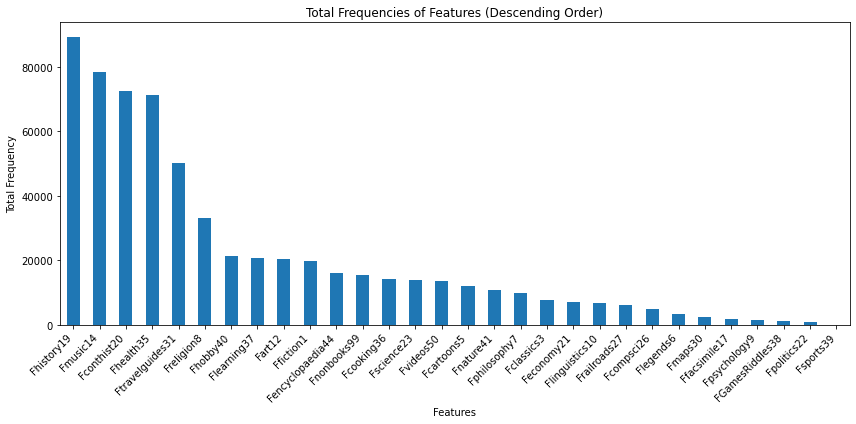

,Feature,Total Frequency
0,Fhistory19,89270
1,Fmusic14,78247
2,Fconthist20,72616
3,Fhealth35,71131
4,Ftravelguides31,50063
5,Freligion8,33071
6,Fhobby40,21500
7,Flearning37,20807
8,Fart12,20516
9,Ffiction1,19921


In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the e-commerce data
file_path = 'Ecommerce data.xlsx'  # Update with your file path
df_ecommerce = pd.ExcelFile(file_path).parse(sheet_name=0)

# Filter columns that start with 'F'
frequency_columns = [col for col in df_ecommerce.columns if col.startswith('F')]

# Calculate the total frequency for each 'F' column
frequency_totals = df_ecommerce[frequency_columns].sum().sort_values(ascending=False)

# Plot the histogram for frequencies in descending order
plt.figure(figsize=(12, 6))
frequency_totals.plot(kind='bar', title="Total Frequencies of Features (Descending Order)")
plt.xlabel("Features")
plt.ylabel("Total Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the top frequencies as a DataFrame for reference
frequency_totals_df = frequency_totals.reset_index()
frequency_totals_df.columns = ['Feature', 'Total Frequency']
frequency_totals_df


In [71]:
# Extract the top 10 categories based on total frequencies
top_categories = frequency_totals.head(10).index.tolist()

# Print the list of top categories
print("Top 10 Categories:", top_categories)


Top 10 Categories: ['Fhistory19', 'Fmusic14', 'Fconthist20', 'Fhealth35', 'Ftravelguides31', 'Freligion8', 'Fhobby40', 'Flearning37', 'Fart12', 'Ffiction1']


In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,33713.000000,8234208.656127,4426014.792489,914.000000,4391616.000000,7967691.000000,11998229.000000,16252640.000000
logtarg,8311.000000,0.130050,0.659962,0.000000,0.000000,0.000000,0.000000,6.082878
r,33713.000000,508.427254,542.440039,0.000000,117.000000,293.000000,712.000000,2460.000000
f,33713.000000,5.820603,7.008049,0.000000,1.000000,3.000000,7.000000,118.000000
m,33713.000000,251.924325,3929.929826,0.000000,39.899994,102.629944,247.297485,532892.000000
...,...,...,...,...,...,...,...,...
Mencyclopaedia44,33713.000000,8.402428,46.021881,0.000000,0.000000,0.000000,0.000000,1999.150391
Mvideos50,33713.000000,6.020431,19.643978,0.000000,0.000000,0.000000,0.000000,794.137695
Mnonbooks99,33713.000000,1.800973,21.383867,0.000000,0.000000,0.000000,0.000000,2412.960938
Unnamed: 66,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Define the top 10 categories
top_categories = ['Fhistory19', 'Fmusic14', 'Fconthist20', 'Fhealth35', 
                  'Ftravelguides31', 'Freligion8', 'Fhobby40', 'Flearning37', 
                  'Fart12', 'Ffiction1']


# Calculate the total mean across the top 10 categories
total_mean = top_10_means.sum()


# Calculate the weighted mean for each feature (excluding the total row)
top_10_means_df['Weighted Mean'] = top_10_means_df['Mean'] / total_mean

# Ensure the total row doesn't have a weighted mean
top_10_means_df.loc[top_10_means_df['Feature'] == 'total', 'Weighted Mean'] = None

# Display the updated DataFrame
print(top_10_means_df)


            Feature      Mean  Weighted Mean
0        Fhistory19  2.647940       0.187093
1          Fmusic14  2.320974       0.163991
2       Fconthist20  2.153947       0.152189
3         Fhealth35  2.109898       0.149077
4   Ftravelguides31  1.484976       0.104923
5        Freligion8  0.980957       0.069311
6          Fhobby40  0.637736       0.045060
7       Flearning37  0.617180       0.043608
8            Fart12  0.608549       0.042998
9         Ffiction1  0.590900       0.041751
10            total 14.153057            NaN
11            total 14.153057            NaN


In [78]:
# Add a column for monetary values by mapping the feature names to their respective values
top_10_means_df['Monetary Value'] = top_10_means_df['Feature'].map(monetary_values)

# Multiply the mean by the monetary value for each category
top_10_means_df['Weighted Monetary Value'] = (
    top_10_means_df['Mean'] * top_10_means_df['Monetary Value']
)

# Ensure no monetary values are calculated for the total row
top_10_means_df.loc[top_10_means_df['Feature'] == 'total', 'Weighted Monetary Value'] = None

# Display the updated DataFrame
print(top_10_means_df)


            Feature      Mean  Weighted Mean  Monetary Value  \
0        Fhistory19  2.647940       0.187093       69.881200   
1          Fmusic14  2.320974       0.163991       69.880210   
2       Fconthist20  2.153947       0.152189       57.423432   
3         Fhealth35  2.109898       0.149077       62.760886   
4   Ftravelguides31  1.484976       0.104923       39.066685   
5        Freligion8  0.980957       0.069311       53.081228   
6          Fhobby40  0.637736       0.045060       24.246052   
7       Flearning37  0.617180       0.043608       82.823642   
8            Fart12  0.608549       0.042998       40.997323   
9         Ffiction1  0.590900       0.041751       20.304280   
10            total 14.153057            NaN             NaN   
11            total 14.153057            NaN             NaN   

    Weighted Monetary Value  
0                185.041222  
1                162.190158  
2                123.687003  
3                132.419084  
4                

In [79]:
# Sum up all the weighted monetary values, excluding rows where the value is NaN
total_weighted_monetary_value = top_10_means_df['Weighted Monetary Value'].sum(skipna=True)

# Add a new row for the total weighted monetary value
top_10_means_df.loc[len(top_10_means_df)] = ['total_weighted_monetary_value', None, None, None, total_weighted_monetary_value]

# Display the updated DataFrame
print(top_10_means_df)

                          Feature      Mean  Weighted Mean  Monetary Value  \
0                      Fhistory19  2.647940       0.187093       69.881200   
1                        Fmusic14  2.320974       0.163991       69.880210   
2                     Fconthist20  2.153947       0.152189       57.423432   
3                       Fhealth35  2.109898       0.149077       62.760886   
4                 Ftravelguides31  1.484976       0.104923       39.066685   
5                      Freligion8  0.980957       0.069311       53.081228   
6                        Fhobby40  0.637736       0.045060       24.246052   
7                     Flearning37  0.617180       0.043608       82.823642   
8                          Fart12  0.608549       0.042998       40.997323   
9                       Ffiction1  0.590900       0.041751       20.304280   
10                          total 14.153057            NaN             NaN   
11                          total 14.153057            NaN      

In [80]:
# Calculate the total of the 'Weighted Monetary Value' column, excluding the total rows
total_weighted_value = top_10_means_df.loc[top_10_means_df['Feature'] != 'total', 'Weighted Monetary Value'].sum()

# Append the total row to the DataFrame
total_row = {
    'Feature': 'total',
    'Mean': total_mean,
    'Weighted Mean': None,
    'Monetary Value': None,
    'Weighted Monetary Value': total_weighted_value
}
top_10_means_df = top_10_means_df.append(total_row, ignore_index=True)

# Display the updated DataFrame
print(top_10_means_df)


                          Feature      Mean Weighted Mean Monetary Value  \
0                      Fhistory19  2.647940      0.187093      69.881200   
1                        Fmusic14  2.320974      0.163991      69.880210   
2                     Fconthist20  2.153947      0.152189      57.423432   
3                       Fhealth35  2.109898      0.149077      62.760886   
4                 Ftravelguides31  1.484976      0.104923      39.066685   
5                      Freligion8  0.980957      0.069311      53.081228   
6                        Fhobby40  0.637736      0.045060      24.246052   
7                     Flearning37  0.617180      0.043608      82.823642   
8                          Fart12  0.608549      0.042998      40.997323   
9                       Ffiction1  0.590900      0.041751      20.304280   
10                          total 14.153057           NaN            NaN   
11                          total 14.153057           NaN            NaN   
12  total_we

In [82]:
#Total of base model is 816.947320  
#Total of cluster model is 15376.782912 *(1/5)
#Weighted Sum: 3041.7849

In [93]:
# Define the totals for the base model and the new cluster model total
base_model_total = 816.947320
weighted_cluster_model_total = 3041.7849  # New weighted cluster model total

# Calculate the percent difference
percent_difference = ((weighted_cluster_model_total - base_model_total) / base_model_total) * 100

# Print the results
print(f"Weighted Cluster Model Total: {weighted_cluster_model_total:.2f}")
print(f"Percent Difference: {percent_difference:.2f}%")


Weighted Cluster Model Total: 3041.78
Percent Difference: 272.34%


# Interpretation

# Assumptions 